# Get datasets

In [1]:
# import main libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
# Find correct folder to use - /Users/shim/Desktop/AI/CovidbyGovt
%pwd

'/Users/shim/Desktop/AI/CovidbyGovt/analysis2'

## Import Covid-19 global data

In [3]:
# direct link to John Hopkins global timeset data 
data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

covid = pd.read_csv(data, sep=",")

# preview our data
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18,18,21,23,25,30,30,30,33,36
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,23,23,24,25,26,26,26,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,275,293,313,326,336,348,364,367,375,384
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,26,29,29,31,33,33,35,35,36,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [4]:
covid.shape

(264, 94)

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 94 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

## Quick analysis of data

In [6]:
today = datetime.now()

# if time is after 5pm (Tucson time), then use today's date 
today5pm = today.replace(hour=17, minute=1, second=0, microsecond=0)
if today > today5pm:
    date = today  

# otherwise use yesterday's date
else:
    date = today - timedelta(1)

# date in string format
date = date.strftime('%D').lstrip("0").replace(" 0", " ")
date = date.replace("/0", "/")
date

'4/20/20'

In [7]:
# get death total
covid[[date]].sum()

4/20/20    169985
dtype: int64

In [8]:
# get US death counts
covid[date][covid["Country/Region"]=='US'].sum()

42094

## Visualize data

In [9]:
# rename columns
# get by country totals 
country_totals = covid[['Country/Region', date]].copy()
country_totals.rename(columns = {date:"deaths", "Country/Region": "country"}, inplace = True)
country_totals.sort_values(by="deaths", ascending=False).head(20)

,country,deaths
225,US,42094
137,Italy,24114
201,Spain,20852
116,France,20265
223,United Kingdom,16509
23,Belgium,5828
133,Iran,5209
120,Germany,4862
62,China,4512
169,Netherlands,3751


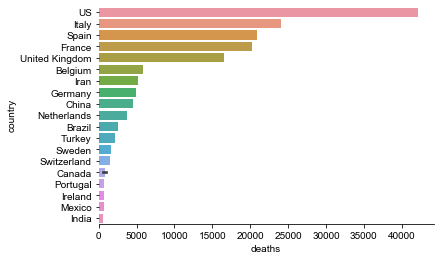

In [10]:
# quick graph 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = country_totals.sort_values(by="deaths", ascending=False).head(20)
g = sns.barplot(x='deaths', y='country', data=data)
sns.despine(left=True)
sns.set_style('white')


### Nicer looking chart, with x-values on y, formatting of values, title

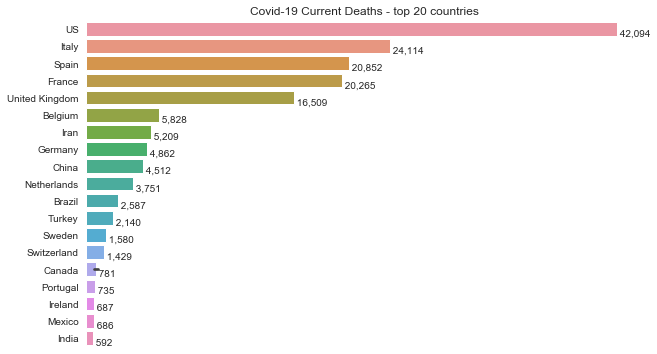

In [11]:
# add values on chart
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# select subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# put values on selected data
g = sns.barplot(ax=ax, x='deaths', y='country', data=data)
show_values_on_bars(g, "h")  

# remove spines
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove labels.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom values
g.set(xticks=[])

# set title
g.set_title("Covid-19 Current Deaths - top 20 countries")

# save graph to a file
g.figure.savefig("top_countries.png")

## Investigate ICU Dataset

In [12]:
# check directory to find 'data' folder in 'CovidbyGovt' folder
%ls

AZ_counties.png
AZ_timeseries.png
AZ_timeseries_log.png
Graphs/
Guardian Chart.png
ICU-TimeseriesAnalysis.ipynb
ICU.ipynb
Pima_timeseries.png
Pima_timeseries_log.png
Top10 countries with Covid-19 deaths over the last 30 days.png
Top10_countries.png
Top10_countries_log.png
Top15 countries with Covid-19 deaths over the last 30 days.png
Top15 countries with Covid-19 deaths.png
US_deaths.png
US_deaths_log.png
US_states30.png
WW_deaths.png
WW_deaths_log.png
meeting_saved_chat.txt*
top_countries.png


In [13]:
icu = pd.read_excel('../data/Other/ICU/KHN_ICU_bed_county_analysis_2.xlsx')
icu.head()

,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct,60plus_per_each_icu_bed
0,1001,Autauga,AL,Alabama,1,1,6,55036,10523,0.191,1754.0
1,1003,Baldwin,AL,Alabama,3,3,51,203360,53519,0.263,1049.0
2,1005,Barbour,AL,Alabama,1,1,5,26201,6150,0.235,1230.0
3,1007,Bibb,AL,Alabama,1,1,0,22580,4773,0.211,NaN
4,1009,Blount,AL,Alabama,1,1,6,57667,13600,0.236,2267.0


In [14]:
icu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cnty_fips                  3142 non-null   int64  
 1   cnty_name                  3142 non-null   object 
 2   st                         3142 non-null   object 
 3   state                      3142 non-null   object 
 4   hospitals_in_cost_reports  3142 non-null   int64  
 5   Hospitals_in_HC            3142 non-null   int64  
 6   all_icu                    3142 non-null   int64  
 7   Total_pop                  3142 non-null   int64  
 8   60plus                     3142 non-null   int64  
 9   60plus_pct                 3142 non-null   float64
 10  60plus_per_each_icu_bed    1477 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 270.1+ KB


In [15]:
icu.isna().sum()

cnty_fips                       0
cnty_name                       0
st                              0
state                           0
hospitals_in_cost_reports       0
Hospitals_in_HC                 0
all_icu                         0
Total_pop                       0
60plus                          0
60plus_pct                      0
60plus_per_each_icu_bed      1665
dtype: int64

In [16]:
# remove column
icu.drop(['60plus_per_each_icu_bed'], axis=1, inplace=True)

In [17]:
# AZ ICU beds by Population
AZ_icu = icu[icu['st'] == 'AZ'].sort_values(by="Total_pop", ascending=False).head(15)
AZ_icu

,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
103,4013,Maricopa,AZ,Arizona,31,34,1004,4155501,808534,0.195
106,4019,Pima,AZ,Arizona,9,9,296,1007257,245814,0.244
107,4021,Pinal,AZ,Arizona,4,4,22,405537,100086,0.247
109,4025,Yavapai,AZ,Arizona,2,2,39,220972,85127,0.385
104,4015,Mohave,AZ,Arizona,4,4,80,204691,73559,0.359
110,4027,Yuma,AZ,Arizona,1,1,42,204281,45739,0.224
98,4005,Coconino,AZ,Arizona,3,3,41,138639,23195,0.167
97,4003,Cochise,AZ,Arizona,4,4,12,126516,35231,0.278
105,4017,Navajo,AZ,Arizona,4,4,12,107902,24267,0.225
96,4001,Apache,AZ,Arizona,4,4,0,71602,14107,0.197


# US by State covid data - merged with ICU data

In [18]:
# direct link to John Hopkins US timeset data 
data2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

covid_US = pd.read_csv(data2, sep=",")

# preview our data
covid_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,42,44,45,45,51,56,58,60,62,63
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,1,1,1,2,3,3,3


In [19]:
covid_US.shape

(3261, 102)

In [20]:
# check US death counts
covid_US[date].sum()

42094

Missing a data point with the global data - because of changing data, I'm not going to worry about this now.

In [21]:
# Find data types
covid_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Columns: 102 entries, UID to 4/20/20
dtypes: float64(3), int64(93), object(6)
memory usage: 2.5+ MB


In [22]:
# merge icu with Covid_US deaths - outer join to collect all deaths (some deaths may not be isolated to county level)
left = covid_US
right = icu
county_deaths = pd.merge(left, right, 
              how='outer', on=None, 
              left_on="FIPS", right_on="cnty_fips")
county_deaths

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3257,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3258,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3259,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Investigate missing data

In [23]:
# check US death counts
county_deaths[date].sum()

42094

In [24]:
# check counts
county_deaths.isna().sum()

UID                  0
iso2                 0
iso3                 0
code3                0
FIPS                10
                  ... 
Hospitals_in_HC    119
all_icu            119
Total_pop          119
60plus             119
60plus_pct         119
Length: 112, dtype: int64

In [25]:
# check counts by investigating missing information
county_deaths[county_deaths['all_icu'].isna()].head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3147,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3148,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3149,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3150,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3151,84070015,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# tally deaths from missing counties
missing = county_deaths[county_deaths['all_icu'].isna()]
missing[date].sum()

641

In [27]:
# show a subset of missing data to investigate
missing.sort_values(by=date, ascending=False).head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
3248,84090044,US,USA,840,90044.0,Unassigned,Rhode Island,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3255,84090051,US,USA,840,90051.0,Unassigned,Virginia,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3229,84090024,US,USA,840,90024.0,Unassigned,Maryland,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3241,84090036,US,USA,840,90036.0,Unassigned,New York,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3238,84090033,US,USA,840,90033.0,Unassigned,New Hampshire,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3230,84090025,US,USA,840,90025.0,Unassigned,Massachusetts,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3149,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3257,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3236,84090031,US,USA,840,90031.0,Unassigned,Nebraska,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Missing will be sorted in the future...so, will keep them in the database

In [28]:
# investigate remaining data in county dataframe
county_deaths.sort_values(by=date, ascending=False).head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
1863,84036061,US,USA,840,36061.0,New York,New York,US,40.767273,-73.971526,...,36061.0,New York,NY,New York,12.0,12.0,761.0,1653877.0,344283.0,0.208
1862,84036059,US,USA,840,36059.0,Nassau,New York,US,40.740665,-73.589419,...,36059.0,Nassau,NY,New York,10.0,10.0,461.0,1363069.0,318040.0,0.233
1317,84026163,US,USA,840,26163.0,Wayne,Michigan,US,42.280984,-83.281255,...,26163.0,Wayne,MI,Michigan,14.0,14.0,586.0,1763822.0,362535.0,0.206
615,84017031,US,USA,840,17031.0,Cook,Illinois,US,41.841448,-87.816588,...,17031.0,Cook,IL,Illinois,46.0,46.0,1606.0,5238541.0,1005046.0,0.192
1884,84036103,US,USA,840,36103.0,Suffolk,New York,US,40.883201,-72.801217,...,36103.0,Suffolk,NY,New York,10.0,10.0,281.0,1497595.0,326104.0,0.218
1780,84034003,US,USA,840,34003.0,Bergen,New Jersey,US,40.960109,-74.071643,...,34003.0,Bergen,NJ,New Jersey,6.0,6.0,147.0,937920.0,211672.0,0.226
1892,84036119,US,USA,840,36119.0,Westchester,New York,US,41.162784,-73.757417,...,36119.0,Westchester,NY,New York,9.0,9.0,179.0,975321.0,214443.0,0.220
1785,84034013,US,USA,840,34013.0,Essex,New Jersey,US,40.786813,-74.246580,...,34013.0,Essex,NJ,New Jersey,7.0,7.0,267.0,800401.0,146732.0,0.183
209,84006037,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,...,6037.0,Los Angeles,CA,California,74.0,76.0,2126.0,10105722.0,1800341.0,0.178
1787,84034017,US,USA,840,34017.0,Hudson,New Jersey,US,40.737662,-74.075157,...,34017.0,Hudson,NJ,New Jersey,6.0,6.0,105.0,679756.0,109974.0,0.162


In [29]:
# remove columns that are doubled by merge
county_deaths.drop(columns=['cnty_fips','cnty_name','state'])

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/18/20,4/19/20,4/20/20,st,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,60,62,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3257,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,9,11,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3258,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3259,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Investigate By County data

In [30]:
# investigate dataset a bit more
county_deaths['Admin2'].value_counts()

Unassigned      51
Washington      31
Jefferson       26
Franklin        25
Lincoln         24
                ..
Botetourt        1
Judith Basin     1
Cecil            1
Waupaca          1
Vanderburgh      1
Name: Admin2, Length: 1901, dtype: int64

Hmmm... lot's of 'Unassigned'

In [31]:
county_deaths.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       'cnty_fips', 'cnty_name', 'st', 'state', 'hospitals_in_cost_reports',
       'Hospitals_in_HC', 'all_icu', 'Total_pop', '60plus', '60plus_pct'],
      dtype='object', length=112)

In [32]:
# total unassigned counties in 'Admin2'
county_deaths[date][county_deaths['Admin2']=='Unassigned'].sum()

522

Those are some of our missing deaths in the US ...have to keep and hope this is fixed in the future data

# Visualize 
## US State Data

In [33]:
# group the state deaths
states = county_deaths[['Province_State', date]].copy()
states = states.groupby(['Province_State'], sort=False).sum().reset_index()

# show descending
states = states.sort_values(by=date, ascending=False)
states.head(10)

,Province_State,4/20/20
37,New York,18611
35,New Jersey,4496
27,Michigan,2468
26,Massachusetts,1706
18,Illinois,1349
43,Pennsylvania,1348
11,Connecticut,1331
23,Louisiana,1328
9,California,1225
14,Florida,822


In [34]:
# check total deaths
states[date].sum()

42094

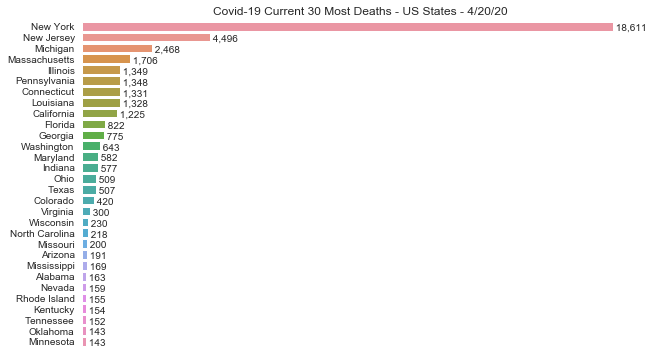

In [35]:
# Graph (CAPS = change info)

# function for setting horizontal labels
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# REPLACE dataset
data = states.head(30)
current_date = str(date)

# plot VALUES on selected data
g = sns.barplot(ax=ax, x=date, y='Province_State', data=data)
show_values_on_bars(g, "h")  

# remove spines
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove labels.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom values
g.set(xticks=[])

# set TITLE
g.set_title("Covid-19 Current 30 Most Deaths - US States - {}".format(current_date))

# save graph to a FILENAME
g.figure.savefig("US_states30.png")

## Visualize AZ County Deaths

In [36]:
# tally of county deaths
co = county_deaths[['Admin2', 'Province_State', date]].copy()
co.rename(columns = {'Admin2':'county','Province_State':'state',date:'total_deaths'}, inplace = True)
co = co.sort_values(by='total_deaths', ascending=False)
co.head(20)

,county,state,total_deaths
1863,New York,New York,14604
1862,Nassau,New York,1329
1317,Wayne,Michigan,1148
615,Cook,Illinois,915
1884,Suffolk,New York,859
1780,Bergen,New Jersey,787
1892,Westchester,New York,776
1785,Essex,New Jersey,751
209,Los Angeles,California,619
1787,Hudson,New Jersey,612


In [37]:
# check total deaths
co["total_deaths"].sum()

42094

In [38]:
# check AZ totals by county
AZ_county = co[co['state']=='Arizona']
AZ_county

,county,state,total_deaths
108,Maricopa,Arizona,75
111,Pima,Arizona,58
103,Coconino,Arizona,31
110,Navajo,Arizona,11
112,Pinal,Arizona,7
101,Apache,Arizona,4
3211,Unassigned,Arizona,1
107,La Paz,Arizona,1
114,Yavapai,Arizona,1
109,Mohave,Arizona,1


Hmmm...Unassigned and Out of AZ need to reassigned ... eventually...for now I'll keep them in the totals

In [39]:
# deaths in AZ - check with chart of states
AZ_county['total_deaths'].sum()

191

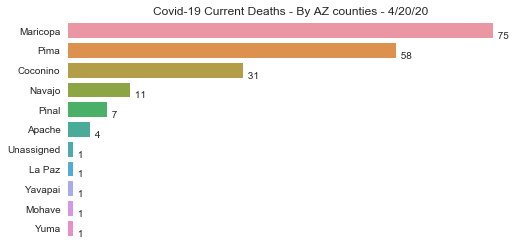

In [40]:
# add values on chart
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# select subplot size
fig, ax = plt.subplots(figsize=(8, 4))  

# put values on selected data
data = AZ_county[AZ_county['total_deaths'] >= 1]
g = sns.barplot(ax=ax, x='total_deaths', y='county', data=data)
show_values_on_bars(g, "h")  

# remove spines
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove labels.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom values
g.set(xticks=[])

# set title
g.set_title("Covid-19 Current Deaths - By AZ counties - {}".format(str(date)))

# save graph to a file
g.figure.savefig("AZ_counties.png")

# Timeseries

## Worldwide Timeseries

In [41]:
# look at past month worldwide
covid_ww = covid.iloc[:, 4:].sum(axis=0)
df = covid_ww.tail(30)
df.tail()

4/16/20    143800
4/17/20    153821
4/18/20    159509
4/19/20    165043
4/20/20    169985
dtype: int64

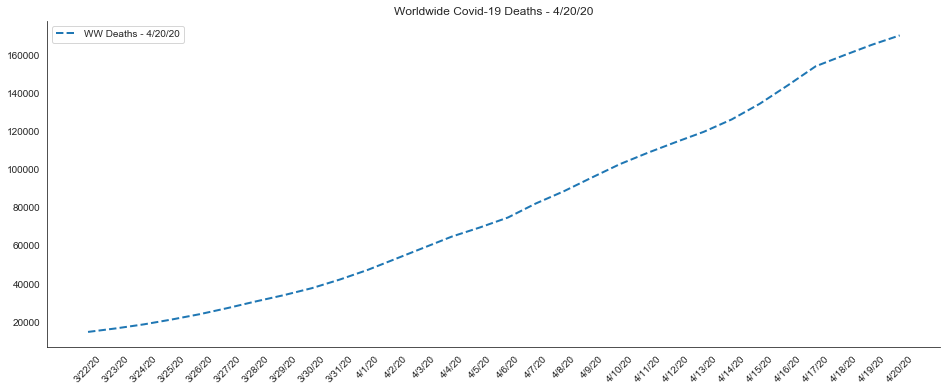

In [42]:
# simple graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2)
sns.despine(right=True, top=True)
ax.lines[0].set_linestyle("--")
plt.xticks(rotation=45)
ax.legend(['WW Deaths - {}'.format(str(date))]) 
plt.title("Worldwide Covid-19 Deaths - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("WW_deaths.png")

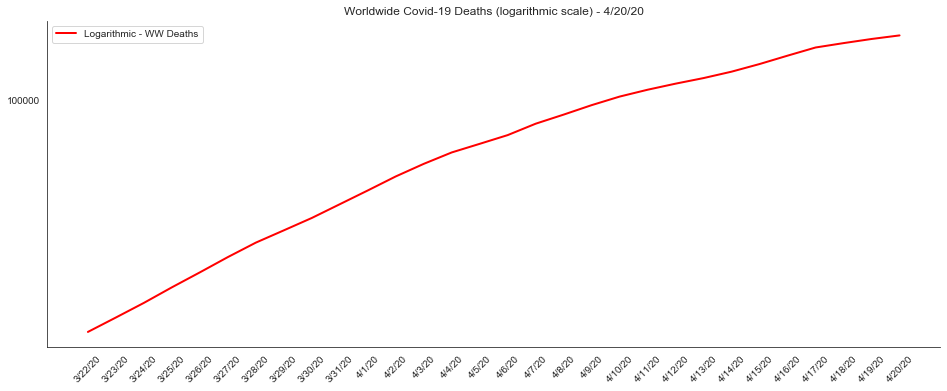

In [43]:
# look at logarithmic growth
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2, color='red')
sns.despine(right=True, top=True)
ax.lines[0].set_linestyle("-")
plt.xticks(rotation=45)
ax.legend(['Logarithmic - WW Deaths']) 
plt.title("Worldwide Covid-19 Deaths (logarithmic scale) - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("WW_deaths_log.png")

## World -> US Timeseries

In [44]:
# melt dataset - Keep certain columns and change others to vertical axis(?)
covid_ww_long = pd.melt(covid, id_vars=covid.iloc[:, :4],
var_name='Date', value_name='Deaths')
covid_ww_long

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
23755,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/20/20,0
23756,NaN,South Sudan,6.877000,31.307000,4/20/20,0
23757,NaN,Western Sahara,24.215500,-12.885800,4/20/20,0
23758,NaN,Sao Tome and Principe,0.186360,6.613081,4/20/20,0


In [45]:
# length of data
covid_ww_long.shape

(23760, 6)

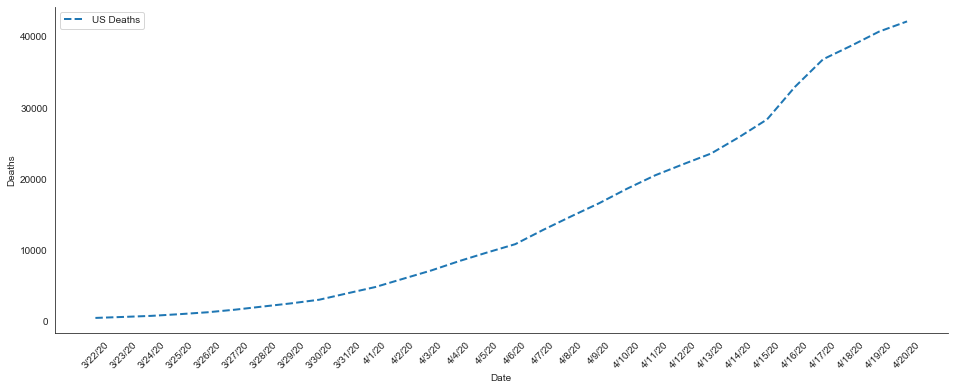

In [46]:
# set country == 'US'
COUNTRY = 'US'
country =covid_ww_long[covid_ww_long['Country/Region' ] == COUNTRY]
country.tail()

# set US dataset for graphs
df = country.tail(30)

# US Timeseries graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x=df['Date'], y=df['Deaths'], sort=False, linewidth=2)
sns.despine(right=True, top=True)
ax.lines[0].set_linestyle("--")
plt.xticks(rotation=45)
ax.legend(['US Deaths']) 
plt.show()
# save graph to a file
fig.savefig("US_deaths.png")

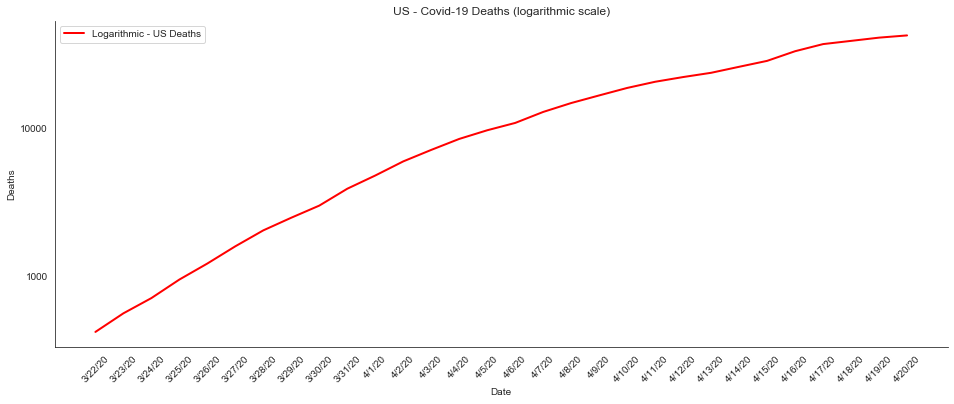

In [47]:
# logarithmic growth
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )
sns.lineplot(x=df['Date'], y=df['Deaths'], sort=False, linewidth=2, color='red')
sns.despine(right=True, top=True)
ax.lines[0].set_linestyle("-")
plt.xticks(rotation=45)
ax.legend(['Logarithmic - US Deaths']) 
plt.title("US - Covid-19 Deaths (logarithmic scale)")
plt.show()
# save graph to a file
fig.savefig("US_deaths_log.png")

## WW -> Data investigations

In [48]:
# investigation to data errors for Canada
Canada = covid[covid['Country/Region']=='Canada']
Canada

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
35,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,40,40,46,48,48,48,50,51,51,59
36,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,58,58,69,69,72,75,77,78,81,82
37,Grand Princess,Canada,37.6489,-122.6655,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,4,4,4,4,5,5,5,5,5,6
39,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
41,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,2,2,3,3,3,3,4,7,9,9
42,Ontario,Canada,51.2538,-85.3232,0,0,0,0,0,0,...,253,274,291,334,385,490,524,564,591,624
43,Prince Edward Island,Canada,46.5107,-63.4168,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,Quebec,Canada,52.9399,-73.5491,0,0,0,0,0,0,...,289,328,360,435,487,630,688,688,820,939


In [49]:
# total Canada deaths
Canada[date].sum()

1725

In [50]:
# Top 10 countries 
# The correct way to aggregate is to use 'df.groupby(['Country/Region'])
# otherwise Canada is not aggregated as a country
country_deaths = covid.groupby(['Country/Region']).sum().reset_index()
country10=country_deaths[['Country/Region', date]].sort_values(by=date, ascending=False).head(10)
country10

,Country/Region,4/20/20
171,US,42094
84,Italy,24114
156,Spain,20852
61,France,20292
175,United Kingdom,16550
16,Belgium,5828
80,Iran,5209
65,Germany,4862
36,China,4636
120,Netherlands,3764


In [51]:
# total deaths in top
country10[date].sum()

148201

In [52]:
# uncovering how to access string list of countries
for i in country10['Country/Region']:
    print(i)

US
Italy
Spain
France
United Kingdom
Belgium
Iran
Germany
China
Netherlands


## WW - > Multiple Country Timeseries

In [53]:
# group countries by date - sort is False here because the date is not the sort
countries = covid_ww_long.groupby(['Date', 'Country/Region'], sort=False).sum().reset_index()

# drop columns that don't make sense
countries.drop(['Lat','Long'], axis=1, inplace=True)

# look at timeseries 
countries

,Date,Country/Region,Deaths
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0
...,...,...,...
16645,4/20/20,Malawi,2
16646,4/20/20,South Sudan,0
16647,4/20/20,Western Sahara,0
16648,4/20/20,Sao Tome and Principe,0


In [54]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            16650 non-null  object
 1   Country/Region  16650 non-null  object
 2   Deaths          16650 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 390.4+ KB


In [104]:
# check that it matches above summary
top = countries[countries['Date']==date].sort_values(by='Deaths', ascending = False).head(10)
top

,Date,Country/Region,Deaths
16621,4/20/20,US,42094
16542,4/20/20,Italy,24114
16603,4/20/20,Spain,20852
16521,4/20/20,France,20292
16619,4/20/20,United Kingdom,16550
16481,4/20/20,Belgium,5828
16538,4/20/20,Iran,5209
16525,4/20/20,Germany,4862
16497,4/20/20,China,4636
16571,4/20/20,Netherlands,3764


In [105]:
# total deaths in top
top['Deaths'].sum()

148201

### Graphs

In [106]:
# add a column for LEGEND to top
top['legend']= top['Country/Region'] + ' - ' + top['Deaths'].astype(str)

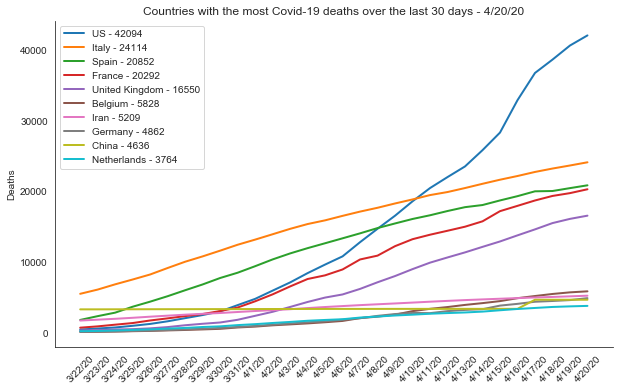

In [107]:
# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# set ATTRIBUTEs for each dataset
for i in top['Country/Region']:
    # set data to last 30 days
    df = countries[countries['Country/Region' ] == i].tail(30)
    # set graph
    g = sns.lineplot(ax=ax, x='Date', y='Deaths', data=df, sort=False, linewidth=2)  

# set date 
current_date = str(date) 

# remove spines
sns.despine(right=True, top=True)
sns.set_style('white')

# set TITLE
g.set_title("Countries with the most Covid-19 deaths over the last 30 days - {}".format(current_date))

# set extras
g.set_xlabel("")
plt.legend(top['legend'])
plt.xticks(rotation=45)
plt.show()

# save graph to a FILENAME
fig.savefig("Top10_countries.png")

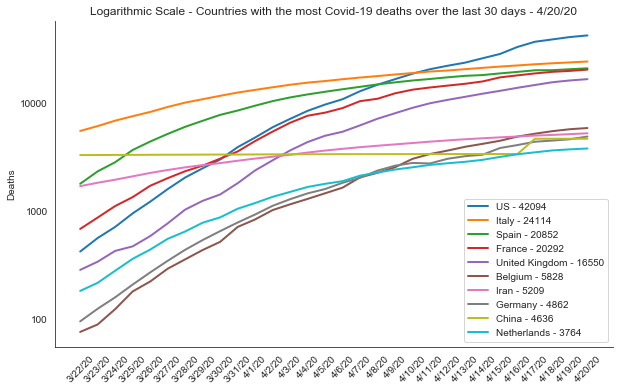

In [108]:
# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# set log scale
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )

# set ATTRIBUTEs for each dataset
for i in top['Country/Region']:
    # set data to last 30 days
    df = countries[countries['Country/Region' ] == i].tail(30)
    # set graph
    g = sns.lineplot(ax=ax, x='Date', y='Deaths', data=df, sort=False, linewidth=2)  

# set line style
ax.lines[0].set_linestyle("-")

# set date 
current_date = str(date) 

# remove spines
sns.despine(right=True, top=True)
sns.set_style('white')

# set TITLE
g.set_title("Logarithmic Scale - Countries with the most Covid-19 deaths over the last 30 days - {}".format(current_date))

# set extras
g.set_xlabel("")
plt.legend(top['legend'])
plt.xticks(rotation=45)
plt.show()

# save graph to a FILENAME
fig.savefig("Top10_countries_log.png")

## Arizona timeseries

In [110]:
# AZ Deaths by Date, ICU and Population 
AZ = county_deaths[county_deaths['Province_State']=='Arizona']

In [111]:
# investigate AZ dataset
AZ

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
101,84004001,US,USA,840,4001.0,Apache,Arizona,US,35.394650,-109.489238,...,4001.0,Apache,AZ,Arizona,4.0,4.0,0.0,71602.0,14107.0,0.197
102,84004003,US,USA,840,4003.0,Cochise,Arizona,US,31.879347,-109.751609,...,4003.0,Cochise,AZ,Arizona,4.0,4.0,12.0,126516.0,35231.0,0.278
103,84004005,US,USA,840,4005.0,Coconino,Arizona,US,35.838834,-111.770718,...,4005.0,Coconino,AZ,Arizona,3.0,3.0,41.0,138639.0,23195.0,0.167
104,84004007,US,USA,840,4007.0,Gila,Arizona,US,33.801901,-110.813278,...,4007.0,Gila,AZ,Arizona,3.0,3.0,8.0,53145.0,18752.0,0.353
105,84004009,US,USA,840,4009.0,Graham,Arizona,US,32.931669,-109.888218,...,4009.0,Graham,AZ,Arizona,1.0,1.0,0.0,37700.0,6933.0,0.184
106,84004011,US,USA,840,4011.0,Greenlee,Arizona,US,33.214988,-109.240528,...,4011.0,Greenlee,AZ,Arizona,0.0,0.0,0.0,9368.0,1631.0,0.174
107,84004012,US,USA,840,4012.0,La Paz,Arizona,US,33.728542,-113.981003,...,4012.0,La Paz,AZ,Arizona,2.0,2.0,3.0,20477.0,9183.0,0.448
108,84004013,US,USA,840,4013.0,Maricopa,Arizona,US,33.348359,-112.491815,...,4013.0,Maricopa,AZ,Arizona,31.0,34.0,1004.0,4155501.0,808534.0,0.195
109,84004015,US,USA,840,4015.0,Mohave,Arizona,US,35.704717,-113.757790,...,4015.0,Mohave,AZ,Arizona,4.0,4.0,80.0,204691.0,73559.0,0.359
110,84004017,US,USA,840,4017.0,Navajo,Arizona,US,35.399771,-110.321898,...,4017.0,Navajo,AZ,Arizona,4.0,4.0,12.0,107902.0,24267.0,0.225


In [112]:
# drop extra columns (not dates)
drops = ['UID','iso2','iso3','code3','Province_State','Country_Region','cnty_fips','cnty_name','st','state','hospitals_in_cost_reports','Hospitals_in_HC','all_icu','Total_pop','60plus','60plus_pct']
AZ_dates = AZ.drop(drops, axis=1,inplace=False)

In [113]:
AZ_dates.columns

Index(['FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key', 'Population',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/2

### Add a column for change

In [114]:
# Yesterday's date

# Today's date
today = datetime.now()

# if time is after 5pm (Tucson time), then use today's date 
today5pm = today.replace(hour=17, minute=1, second=0, microsecond=0)
if today > today5pm:
    date_ext = today  

# otherwise use yesterday's date for data
else:
    date_ext = today - timedelta(1)
    
# define yesterday (external) is in datetime format
yesterday_ext = date_ext - timedelta(1)

# yesterday in string format
yesterday = yesterday_ext.strftime('%D').lstrip("0").replace(" 0", " ")
yesterday = yesterday.replace("/0", "/")
yesterday

'4/19/20'

In [115]:
AZ_dates['Change'] = AZ_dates[date] - AZ_dates[yesterday]

In [116]:
# Show list of counties and current deaths
AZ_dates = AZ_dates.sort_values(by='Population', ascending=False)
AZ_dates[['Combined_Key', 'Population', date,'Change']]

,Combined_Key,Population,4/20/20,Change
108,"Maricopa, Arizona, US",4485414,75,0
111,"Pima, Arizona, US",1047279,58,2
112,"Pinal, Arizona, US",462789,7,0
114,"Yavapai, Arizona, US",235099,1,0
115,"Yuma, Arizona, US",213787,1,0
109,"Mohave, Arizona, US",212181,1,0
103,"Coconino, Arizona, US",143476,31,5
102,"Cochise, Arizona, US",125922,0,0
110,"Navajo, Arizona, US",110924,11,0
101,"Apache, Arizona, US",71887,4,0


In [118]:
# convert dates to index
AZ_dates = AZ_dates.drop(['Change'], axis=1)
df = AZ_dates.iloc[:, 12:].sum(axis=0)
df.tail()

4/16/20    150
4/17/20    169
4/18/20    180
4/19/20    184
4/20/20    191
dtype: int64

In [119]:
# change dataset for start of deaths
df = df[df>0]

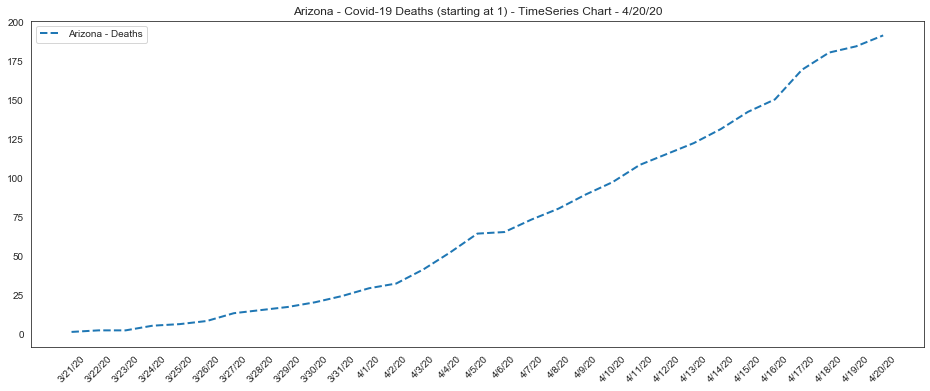

In [67]:
# timeseries graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2)
ax.lines[0].set_linestyle("--")
plt.xticks(rotation=45)
ax.legend(['Arizona - Deaths']) 
plt.title("Arizona - Covid-19 Deaths (starting at 1) - TimeSeries Chart - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("AZ_timeseries.png")

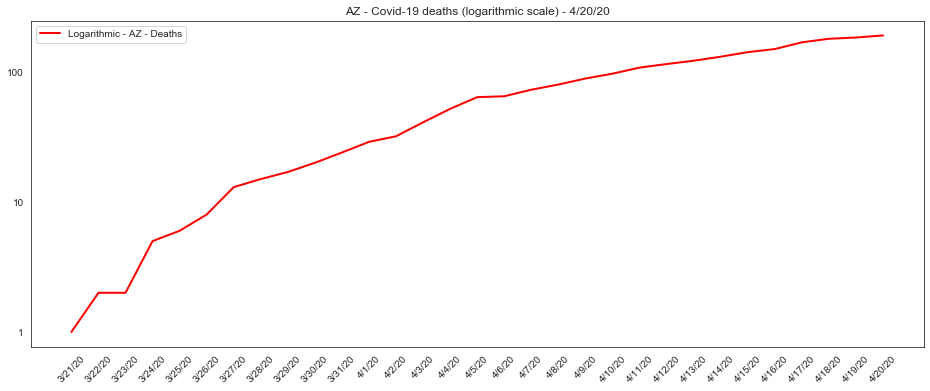

In [68]:
# look at logarithmic timeseries growth
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2, color='red')
ax.lines[0].set_linestyle("-")
plt.xticks(rotation=45)
ax.legend(['Logarithmic - AZ - Deaths']) 
plt.title("AZ - Covid-19 deaths (logarithmic scale) - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("AZ_timeseries_log.png")

## Pima County Timeseries

In [69]:
# search for Pima by FIPS#
Pima = AZ[AZ['FIPS']==4019.0]
Pima

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
111,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,...,4019.0,Pima,AZ,Arizona,9.0,9.0,296.0,1007257.0,245814.0,0.244


In [70]:
# drop extra columns
drops = ['cnty_fips','cnty_name','st','state','hospitals_in_cost_reports','Hospitals_in_HC','all_icu','Total_pop','60plus','60plus_pct']
Pima_dates = Pima.drop(drops, axis=1,inplace=False)
Pima_dates.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20',
       '4/17/20', '4/18/20', '4/19/20', '4/20/20'],
      dtype='object', length=102)

In [71]:
# convert dates to index
df = Pima_dates.iloc[:, 12:].sum(axis=0)
df.tail()

4/16/20    29
4/17/20    29
4/18/20    56
4/19/20    56
4/20/20    58
dtype: int64

In [72]:
# set dataset for graphs
df=df[df>0]
df

3/24/20     1
3/25/20     1
3/26/20     1
3/27/20     4
3/28/20     4
3/29/20     4
3/30/20     4
3/31/20     4
4/1/20      4
4/2/20     11
4/3/20     11
4/4/20     11
4/5/20     12
4/6/20     13
4/7/20     13
4/8/20     16
4/9/20     16
4/10/20    16
4/11/20    16
4/12/20    29
4/13/20    29
4/14/20    29
4/15/20    29
4/16/20    29
4/17/20    29
4/18/20    56
4/19/20    56
4/20/20    58
dtype: int64

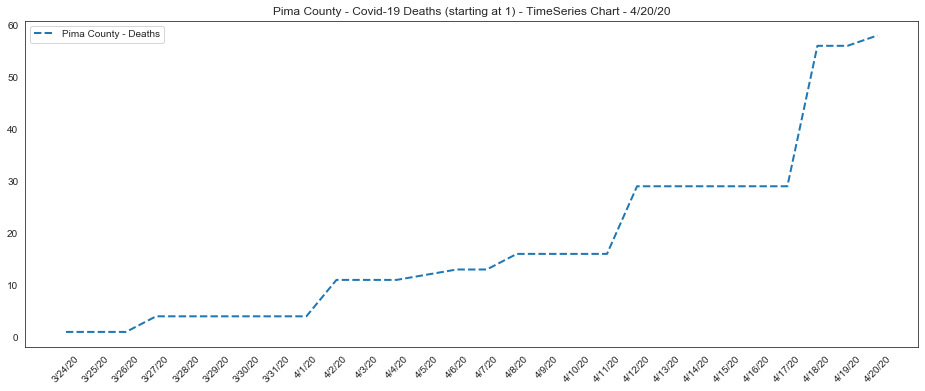

In [73]:
# timeseries graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2)
ax.lines[0].set_linestyle("--")
plt.xticks(rotation=45)
ax.legend(['Pima County - Deaths']) 
plt.title("Pima County - Covid-19 Deaths (starting at 1) - TimeSeries Chart - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("Pima_timeseries.png")

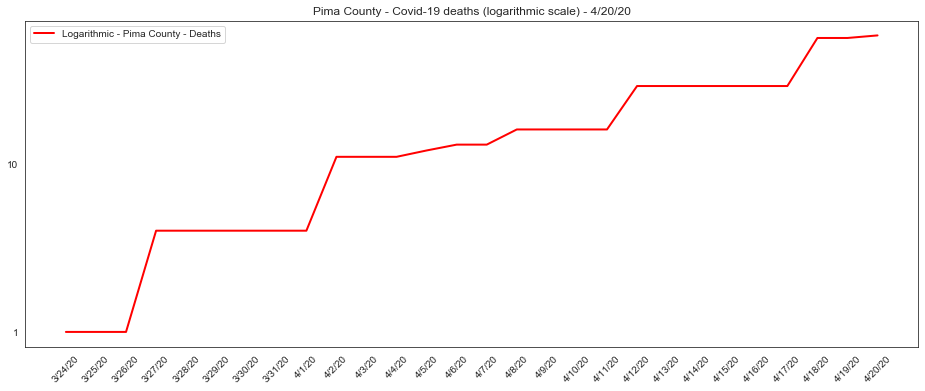

In [74]:
# look at logarithmic timeseries growth
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2, color='red')
ax.lines[0].set_linestyle("-")
plt.xticks(rotation=45)
ax.legend(['Logarithmic - Pima County - Deaths']) 
plt.title("Pima County - Covid-19 deaths (logarithmic scale) - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("Pima_timeseries_log.png")

## Summary

As of 4/12/20, Pima County doesn't seem to be experiencing the escalation of the rest of the world, country, or state! 
The home stay started on 3/16/20. Maybe that was enough time to delay the onset?

We will have to look at it with predictions from other countries that got some warning and were able to put measures in place to sop the rate of escalation.

## Pima rate of growth

In [75]:
Pima_dates

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
111,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,...,16,29,29,29,29,29,29,56,56,58


In [76]:
#Unpivot DataFrame from wide to long format, optionally leaving identifiers set.

Pima_long = pd.melt(Pima_dates, id_vars=Pima_dates.iloc[:,:12],
var_name='Date', value_name='Deaths')
Pima30 = Pima_long.tail(30)
Pima30.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,Date,Deaths
60,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,"Pima, Arizona, US",1047279,3/22/20,0
61,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,"Pima, Arizona, US",1047279,3/23/20,0
62,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,"Pima, Arizona, US",1047279,3/24/20,1
63,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,"Pima, Arizona, US",1047279,3/25/20,1
64,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,"Pima, Arizona, US",1047279,3/26/20,1


In [77]:
Pima30[['PC']]=Pima30[['Deaths']].pct_change()
Pima30.tail()

/Users/shim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,Date,Deaths,PC
85,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/16/20,29,0.000000
86,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/17/20,29,0.000000
87,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/18/20,56,0.931034
88,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/19/20,56,0.000000
89,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/20/20,58,0.035714


In [78]:
df = Pima30

In [79]:
# set dataset for graphs
df=df[df['Deaths']>0]
df.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,Date,Deaths,PC
85,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/16/20,29,0.000000
86,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/17/20,29,0.000000
87,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/18/20,56,0.931034
88,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/19/20,56,0.000000
89,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,"Pima, Arizona, US",1047279,4/20/20,58,0.035714


Not helpful because reporting for Pima seems to be once or twice weekly rather than daily

## TO DO:
1. Change data to look at increment per day per country - KEY!!!!!!!!!
2. Look at rate of increase
3. Look at time-series - # of days vs # of deaths, # of days vs. # of cases
4. Seperate out test cases vs training case
    - US separately is the Test case
    - outlier - South Korea, Singapore, China
    - ROW is the training case
5. Look at 2 plots
    - in deaths 
    - in deaths as a % of pop
    

## Rate of growth (PC) by country

## Rate of growth (PC) by state